In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats
import seaborn as sns
import requests
from io import BytesIO

In [2]:
# df_2020 = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_2020.csv.gz?raw=True', compression='gzip', low_memory=False)

In [3]:
# saving data to csv
# df_2020.to_csv('play_by_play_2020.csv.gz', compression = 'gzip', index = False )

In [2]:
#reading in saved data
df_2020 = pd.read_csv('play_by_play_2020.csv.gz', compression = 'gzip', low_memory = False)

In [5]:
df = df_2020
epa_df = pd.DataFrame({
    'offense_epa': df.groupby('posteam')['epa'].sum(),
    'offense_plays': df['posteam'].value_counts(),
    'offense_yards': df.groupby('posteam')['yards_gained'].sum(), 
})

epa_df['offense_epa/play'] = epa_df['offense_epa'] / epa_df['offense_plays']

epa_df.sort_values(by='offense_epa/play', ascending=False).head()

,offense_epa,offense_plays,offense_yards,offense_epa/play
GB,217.450182,1454,7093.0,0.149553
KC,212.128636,1611,7886.0,0.131675
TEN,171.590883,1416,6560.0,0.121180
BUF,184.187562,1587,7323.0,0.116060
TB,144.390813,1661,7659.0,0.086930


In [6]:
epa_df = pd.DataFrame({
    'offense_epa': df.groupby('posteam')['epa'].sum(),
    'offense_plays': df['posteam'].value_counts(),
    'offense_yards': df.groupby('posteam')['yards_gained'].sum(), 
})

epa_df['offense_epa/play'] = epa_df['offense_epa'] / epa_df['offense_plays']

epa_df.sort_values(by='offense_epa/play', ascending=False).head()

,offense_epa,offense_plays,offense_yards,offense_epa/play
GB,217.450182,1454,7093.0,0.149553
KC,212.128636,1611,7886.0,0.131675
TEN,171.590883,1416,6560.0,0.121180
BUF,184.187562,1587,7323.0,0.116060
TB,144.390813,1661,7659.0,0.086930


In [5]:
epa_df['defense_epa'] = df.groupby('defteam')['epa'].sum()
epa_df['defense_plays'] = df['defteam'].value_counts()
epa_df['defense_epa/play'] = epa_df['defense_epa'] / epa_df['defense_plays']
epa_df['defense_yards_given_up'] = df.groupby('defteam')['yards_gained'].sum()

epa_df.sort_values(by='defense_epa/play', ascending=False).head()

,offense_epa,offense_plays,offense_yards,offense_epa/play,defense_epa,defense_plays,defense_epa/play,defense_yards_given_up
DET,-10.308683,1314,5607.0,-0.007845,163.433379,1387,0.117832,6726.0
HOU,61.912818,1242,6006.0,0.049849,151.797907,1365,0.111207,6674.0
JAX,-86.490552,1291,5224.0,-0.066995,130.265492,1387,0.093919,6685.0
TEN,171.590883,1416,6560.0,0.121180,128.128089,1454,0.088121,6775.0
LV,64.340031,1344,6135.0,0.047872,117.039579,1367,0.085618,6233.0


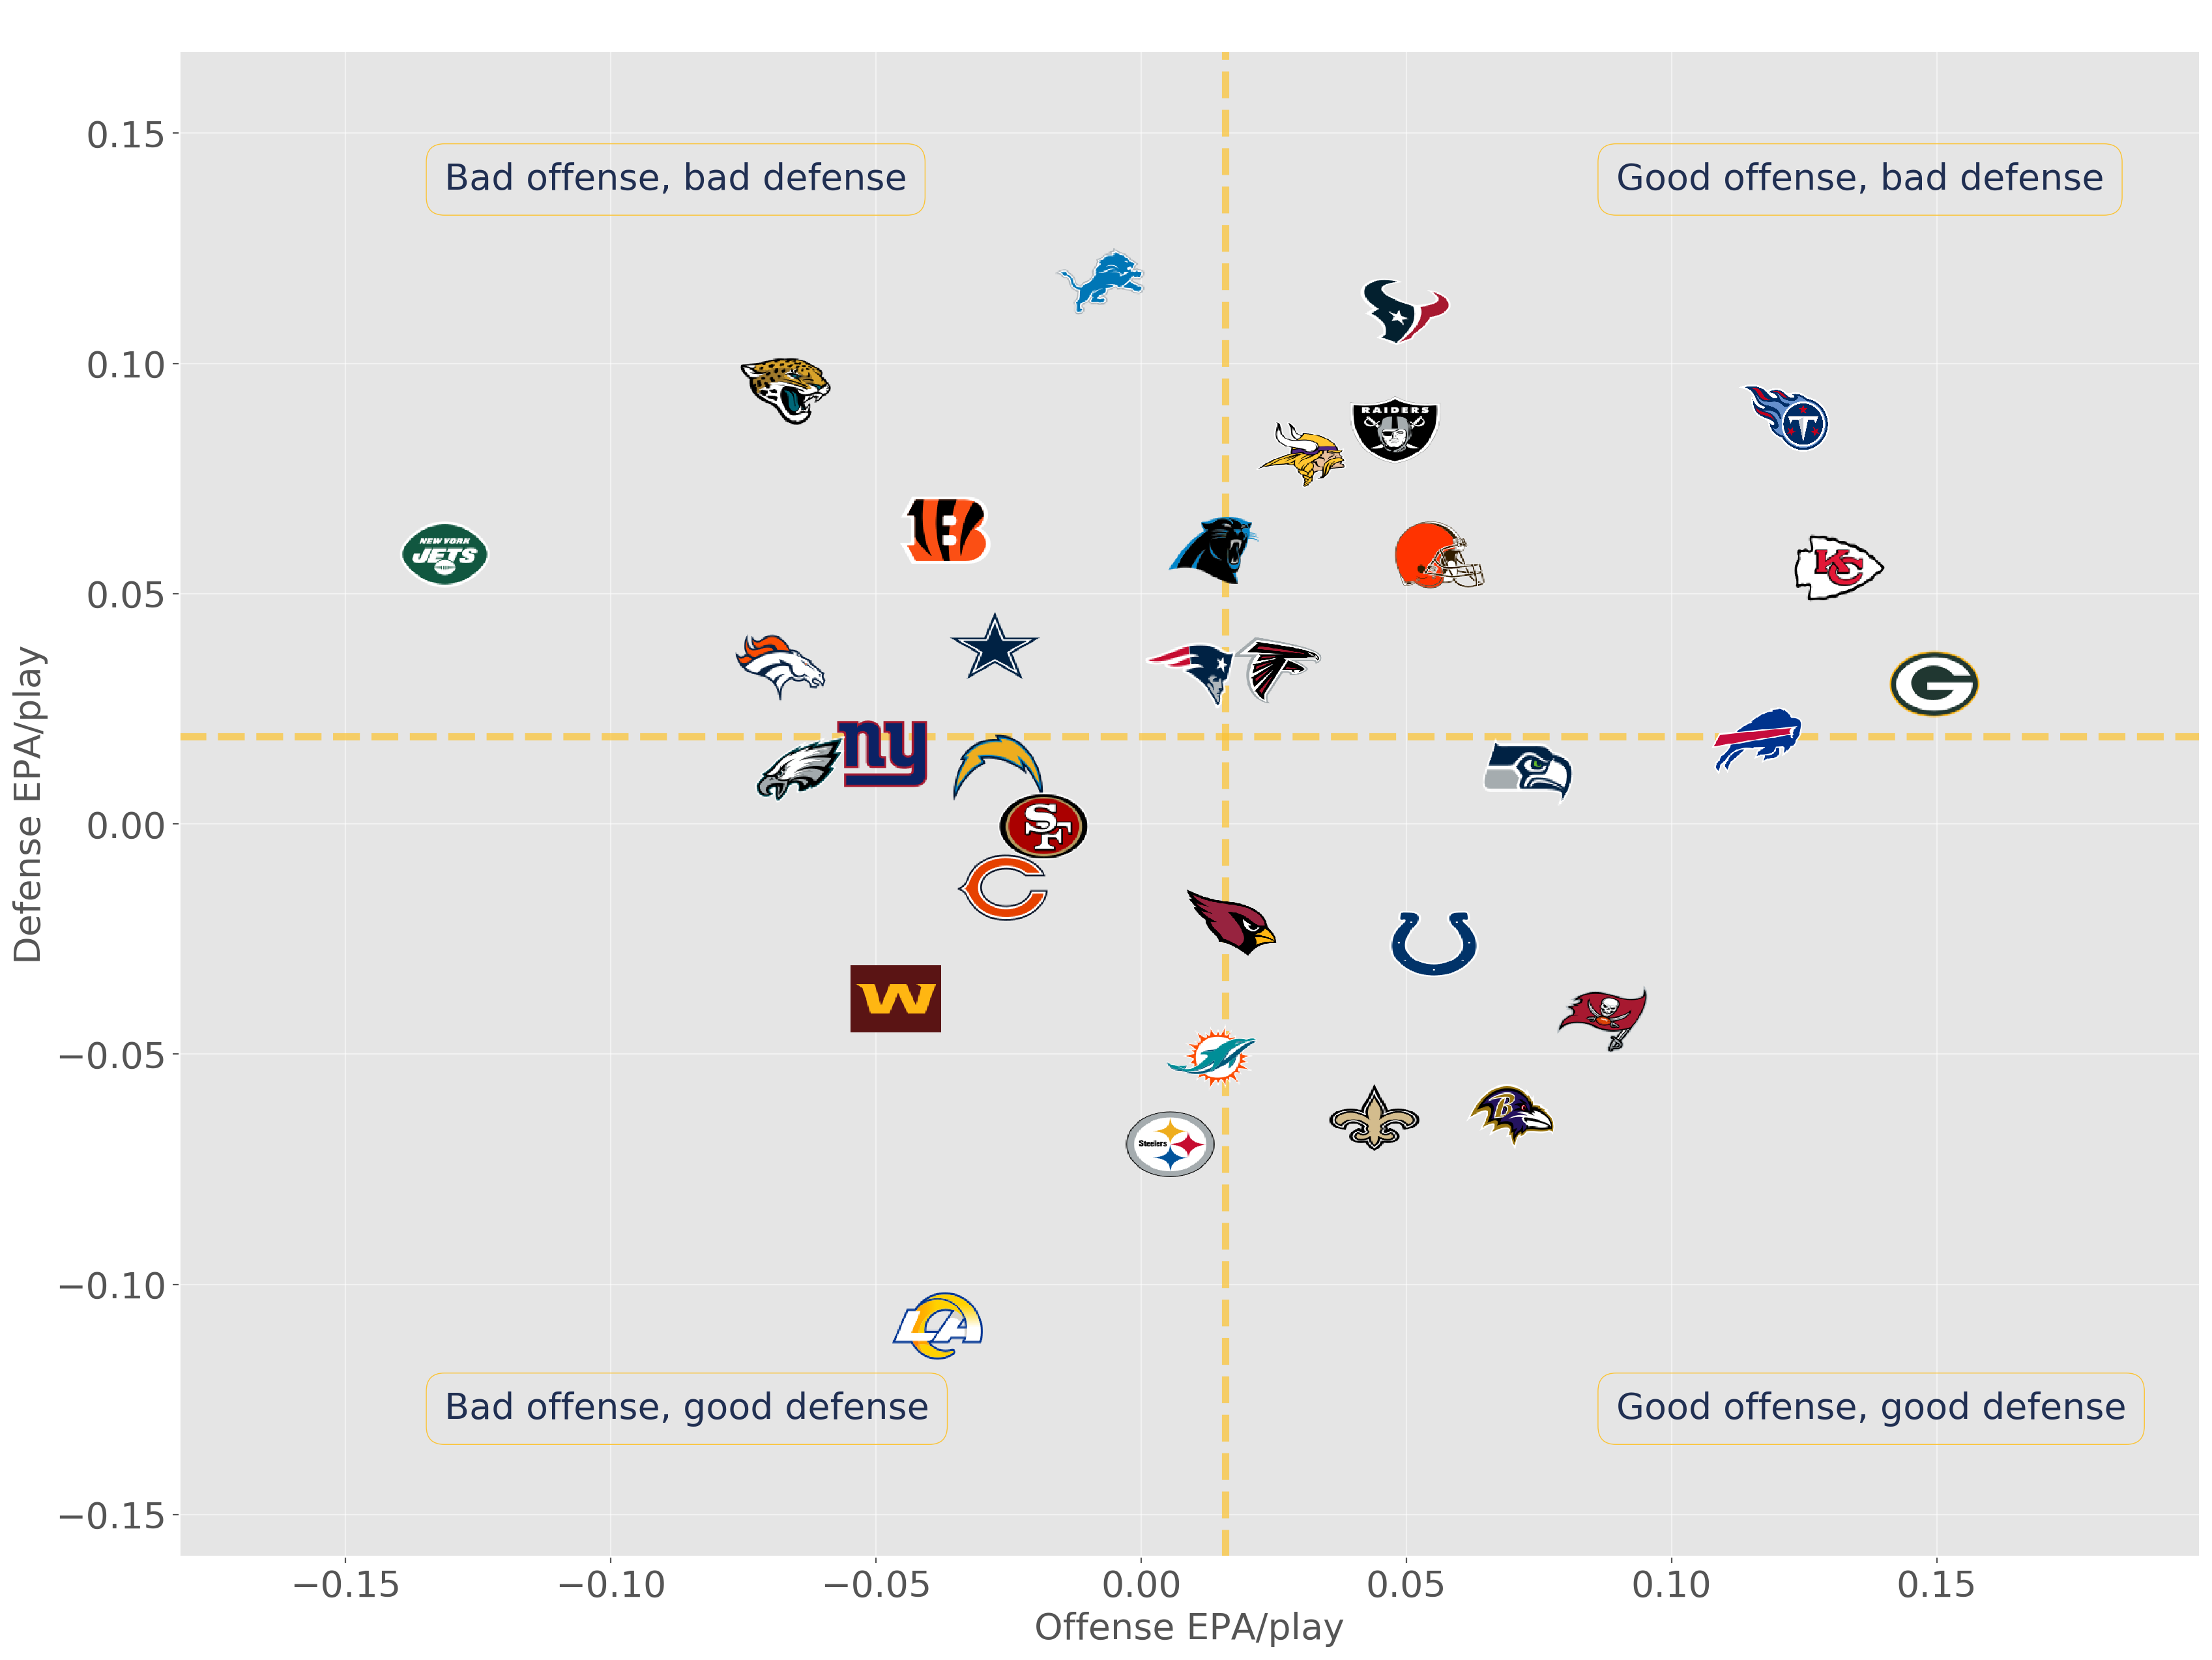

In [7]:
plt.style.use('ggplot')

x = epa_df['offense_epa/play'].values
y = epa_df['defense_epa/play'].values

fig, ax = plt.subplots(figsize=(20, 15))

ax.grid(alpha=0.5)

# plot a vertical and horixontal line to create separate quadrants
ax.vlines(np.mean(x), y.min() - 0.05, y.max() + 0.05, color='#fcc331', alpha=0.7, lw=4, linestyles='dashed')
ax.hlines(np.mean(y), x.min() - 0.05, x.max() + 0.05, color='#fcc331', alpha=0.7, lw=4, linestyles='dashed')
ax.set_ylim(y.min() - 0.05, y.max() + 0.05)
ax.set_xlim(x.min() - 0.05, x.max() + 0.05)
ax.set_xlabel('Offense EPA/play', fontsize=20)
ax.set_ylabel('Defense EPA/play', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

annot_styles = {
    'bbox': {'boxstyle': 'round,pad=0.5', 'facecolor': 'none', 'edgecolor':'#fcc331'},
    'fontsize': 20,
    'color': '#202f52'
}

# annotate the quadrants
ax.annotate('Good offense, good defense', xy=(x.max() - 0.06, y.min() - 0.02), **annot_styles)
ax.annotate('Bad offense, good defense', xy=(x.min(), y.min() - 0.02), **annot_styles)
ax.annotate('Good offense, bad defense', xy=(x.max() - 0.06, y.max() + 0.02), **annot_styles)
ax.annotate('Bad offense, bad defense', xy=(x.min(), y.max() + 0.02), **annot_styles)

team_colors = pd.read_csv('https://raw.githubusercontent.com/guga31bb/nflfastR-data/master/teams_colors_logos.csv')

# annotate the points with team logos
for idx, row in epa_df.iterrows():
  offense_epa = row['offense_epa/play']
  defense_epa = row['defense_epa/play']
  logo_src = team_colors[team_colors['team_abbr'] == idx]['team_logo_wikipedia'].values[0]
  res = requests.get(logo_src)
  img = plt.imread(BytesIO(res.content))
  ax.imshow(img, extent=[row['offense_epa/play']-0.0085, row['offense_epa/play']+0.0085, row['defense_epa/play']-0.00725, row['defense_epa/play']+0.00725], aspect='auto', zorder=1000)

ax.set_title('Offense EPA and Defense EPA', fontsize=20);